# News Analyzer

In [30]:
import requests
import pandas as pd

## Requests
### reqeust for API key on [News API](https://newsapi.org") and update API key on key variable

In [31]:
key = '5e74c7cf9e344e3e8c04210f9b75125b'
response = requests.get('https://newsapi.org/v2/sources?'
			   'language=en&country=us&'
			   'apiKey=' + key)
sources = response.json()['sources']
df = pd.DataFrame();
pd.set_option('display.max_columns', 7)
for source in sources:
  row = pd.Series(source)
  df = df.append(row, ignore_index = True)
df.set_index("name", inplace = True)

In [32]:
print(df)

                                category country  \
name                                               
ABC News                         general      us   
Al Jazeera English               general      us   
Ars Technica                  technology      us   
Associated Press                 general      us   
Axios                            general      us   
Bleacher Report                   sports      us   
Bloomberg                       business      us   
Breitbart News                   general      us   
Business Insider                business      us   
Buzzfeed                   entertainment      us   
CBS News                         general      us   
CNN                              general      us   
Crypto Coins News             technology      us   
Engadget                      technology      us   
Entertainment Weekly       entertainment      us   
ESPN                              sports      us   
ESPN Cric Info                    sports      us   
Fortune     

## Method: eachNewsHeadlines
### collects each 55 news headline

In [33]:
import queue
import threading
def eachNewsHeadlines(ID, q):
	response = requests.get('https://newsapi.org/v2/top-headlines?sources=' + ID + '&apiKey=' + key)
	json = response.json()
	if json['status'] != 'ok':
		raise IOError('API key is probably overused :(')
	topNews = []
	topNews.append(ID)
	for elem in json['articles']:
		topNews.append(elem['title'])
	q.put(topNews)

In [34]:
threads = []
q = queue.Queue()
for id in df['id']:
  t = threading.Thread(target = eachNewsHeadlines, args = (id, q))
  threads.append(t)
  t.start()
for t in threads:
  t.join()

headlines = []
while not q.empty():
  headlines.append(q.get())
#for id in df['id']:
#  headlines.append(eachNewsHeadlines(id))
print(headlines)

[['bleacher-report', 'NBA', 'Anthony Edwards B/R Exclusive', '2020 MLB Prospect Power Rankings for Top 30 Catchers', 'Addressing the Biggest Questions About NBA Draft Prospect Obi Toppin', 'The Biggest MLB Trade Chips Available from Sellers Ahead of 2020 Deadline', '2020 NBA Draft: Long Shots Who Could Sneak into the Lottery', "NBA Players Drop in to 'Courtnite'"], ['associated-press', "London's famous Tower Bridge gets stuck in an open position", "Ketamine that's injected during arrests draws new scrutiny", 'AP EXCLUSIVE: US faces back-to-school laptop shortage', 'In just a week, wildfires burn 1 million acres in California', "AP FACT CHECK: Trump's distortion on Dems and the pledge", 'As more colleges stay online, students demand tuition cuts', 'The bully pulpit: Trump pushes Washington, but virus resists', 'Miami ICU nurse: I have never in my life seen so many deaths', 'House passes bill to reverse changes blamed for mail delays ', '2 tropical storms heading for double blow to US Gu

## Method: parseWords
### this will parse the headlines to count how many times each vocabs appears in headlines

In [ ]:
import re

In [ ]:
def parseWords(headlines, dic):
  for headline in headlines:
    for line in headline[1:]:
      vocabs = re.split('\W+', line)
      for vocab in vocabs:
        if vocab in dic:
          dic[vocab] += 1
        else:
          dic[vocab] = 1

In [ ]:
parseWords(headlines, parseVocab)
print(parseVocab)

{'Protesters': 6, 'arrested': 2, 'in': 154, 'Charlotte': 2, 'as': 35, 'GOP': 22, 'delegates': 2, 'arrive': 4, 'Trump': 96, 'ordered': 3, 'to': 225, 'pay': 4, '44': 3, '100': 13, 'Stormy': 3, 'Daniels': 3, 'legal': 3, 'fees': 3, 'US': 16, 'WeChat': 3, 'users': 4, 'sue': 6, 'over': 16, 'order': 3, 'banning': 2, 'messaging': 2, 'app': 7, 'House': 33, 'set': 4, 'vote': 13, 'on': 82, 'USPS': 14, 'bill': 10, 'amid': 11, 'mail': 10, 'voting': 4, 'controversy': 2, 'Officials': 6, 'Police': 10, 'shoot': 3, 'kill': 3, 'man': 3, 'outside': 3, 'store': 3, 'Louisiana': 3, 'Statue': 2, 'of': 119, 'lauded': 2, 'rocker': 2, 'Chris': 3, 'Cornell': 2, 'vandalized': 2, 'Seattle': 2, 'Family': 2, 'says': 19, 'lost': 2, 'veterans': 2, 'remains': 2, 'Tropical': 4, 'Storm': 2, 'Laura': 4, 'Marco': 4, 'simultaneously': 2, 'heading': 2, 'toward': 2, 'Gulf': 10, 'Mexico': 4, 'Smoke': 3, 'fills': 2, 'air': 2, 'Portland': 9, 'police': 3, 'clear': 2, 'riot': 2, 'at': 34, 'precinct': 2, 'Steve': 3, 'Bannon': 2, 'ca

In [ ]:
keyword = list(parseVocab.keys())
occurancy = list(parseVocab.values())

In [ ]:
dict_for_words = {
    'keywords': keyword,
    'occurancy': occurancy
}

In [ ]:
topWords = pd.DataFrame(dict_for_words)
topWords.set_index('keywords', inplace = True)
topWords.sort_values(by = 'occurancy',ascending= False) 

,occurancy
keywords,
to,225
s,203
the,167
in,154
,151
...,...
Scarecrow,1
Gordon,1
Barbara,1


In [ ]:
eliminated = ["to", "s"]

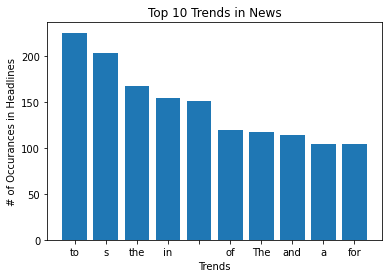

In [ ]:
import matplotlib.pyplot as plt
top10Words = sorted(parseVocab, key = lambda x: parseVocab[x], reverse = True)[:10]
top10Occur = [parseVocab[x] for x in top10Words]
plt.bar(top10Words, top10Occur)
plt.title('Top 10 Trends in News')
plt.ylabel('# of Occurances in Headlines')
plt.xlabel('Trends')
plt.show()